In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from scipy.stats import shapiro

**Задание**  
**Цель**: Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.  
**Описание задания**:  
В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с [сайта](https://www.kaggle.com/uciml/glass). Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

1. Получите данные и загрузите их в рабочую среду

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/artificialflesh/training_projects/master/05_features_n_models/10_glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


2. Проведите первичный анализ.  
    а) Проверьте количество записей для каждого класса. Сделайте вывод.

In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Пропусков нет, подмененных строковыми значениями пропусков (e.g. '?') тоже.

Явный дисбаланс классов: у типа 7 меньше представителей, чем хотелось бы, у типов 3, 5, 6 — критически мало. Могут быть проблемы с определением этих типов стекла при обучении моделей.

3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [6]:
X = df.drop('Type', axis=1)

In [7]:
y = df['Type']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Обучите модель дерева решений [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) на обучающем множестве.

In [9]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
random_forest.score(X_train, y_train)

1.0

5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [10]:
random_forest.score(X_test, y_test)

0.8372093023255814

Без регуляризации модели ожидаемо произошло переобучение.

6. Обработайте выбросы в данных.  
    а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции [sns.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html), [sns.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) \('This function has been deprecated and will be removed in seaborn v0.14.0. It has been replaced by histplot() and displot()', заменим на [sns.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)). Есть ли признаки с нормальным распределением?  
    b) Исследуйте признаки на выбросы несколькими способами.  
    c) Удалите выбросы.

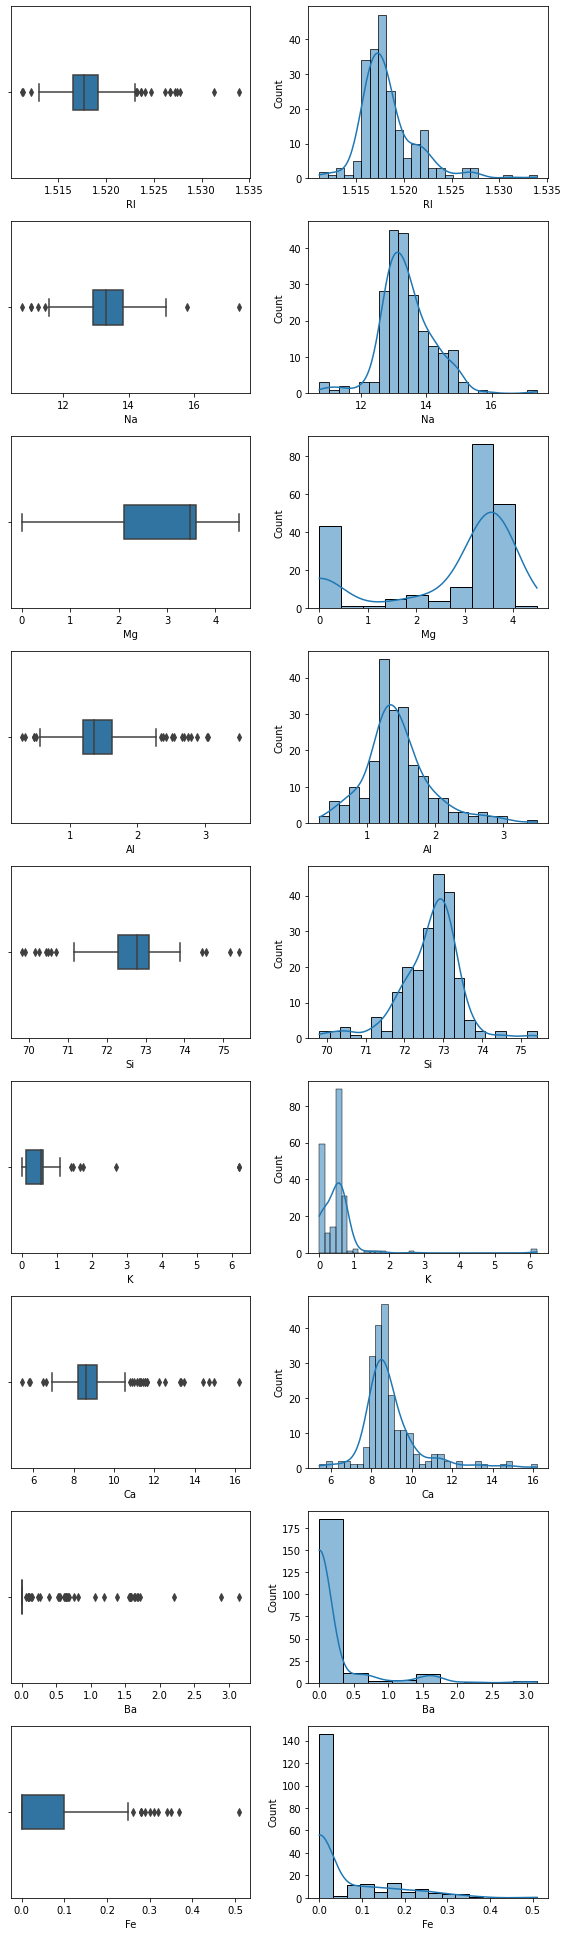

In [11]:
fig, axes = plt.subplots(nrows=len(X.columns), ncols=2, figsize=(8, 3 * len(X.columns)))

for i, col in enumerate(X.columns):
    sns.boxplot(x=df[col], width=0.2, ax=axes[i, 0])
    sns.histplot(df[col], kde=True, ax=axes[i, 1])

plt.tight_layout()
plt.show()

In [12]:
for col in X.columns:
  print(shapiro(df[col])[1])

1.0766432233591527e-12
3.4656832781365665e-07
2.3908993861355223e-19
2.083195624891232e-07
2.174813440447565e-09
2.1721748481042377e-25
4.2866537515527225e-16
5.383263238128378e-26
1.156668784076633e-20


Признаков с нормальным распределением нет.

In [13]:
classifiers = {
    'LocalOutlierFactor': LocalOutlierFactor(),
    'OneClassSVM': OneClassSVM(nu=0.1),
    'EllipticEnvelope': EllipticEnvelope(random_state=42),
    'IsolationForest': IsolationForest(random_state=42)
}

In [14]:
for k, v in classifiers.items():
  outliers = v.fit_predict(df) == -1
  print(k, sum(outliers))

LocalOutlierFactor 36
OneClassSVM 22
EllipticEnvelope 22
IsolationForest 23


Удалим выбросы. Итоговым способом определения выбросов оставим LOF

In [15]:
model = LocalOutlierFactor()
outliers = model.fit_predict(df) == -1
df = df[~outliers]

7. Обучите модель дерева решений [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) на обучающем множестве. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [16]:
X = df.drop('Type', axis=1)

In [17]:
y = df['Type']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
random_forest.score(X_train, y_train)

1.0

In [20]:
random_forest.score(X_test, y_test)

0.8333333333333334

Точность модели после удаления выбросов хуже на 0.003875968992248069.

Исследовать данные на выбросы определенно нужно, однако удаление — не единственный способ работы с выбросами, и не всегда самый эффективный.